In [49]:
import momepy
import geopandas as gpd
import matplotlib.pyplot as plt
from libpysal.weights import Queen, Rook, KNN
%matplotlib inline

In [50]:
df = gpd.read_file('parcels.shp')

In [51]:
df = df.reset_index()[['index', 'geometry']]
df = df.rename(columns={'index': 'ID'})

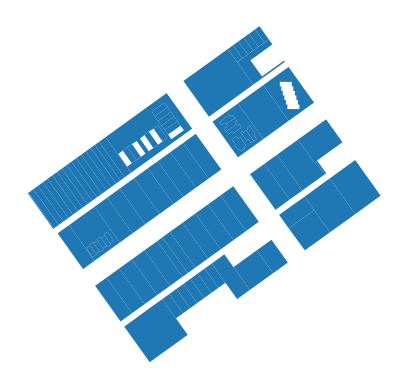

In [52]:
ax = df.plot()
ax.set_axis_off()

In [53]:
crs = df.estimate_utm_crs().to_epsg()
df = df.to_crs(crs)

# preprocess


In [54]:
#df_clean = momepy.preprocess(df, size=30,
#                              compactness=0.3, islands=True, loops=5)

In [55]:
#df_clean.plot()

# limit set at 20

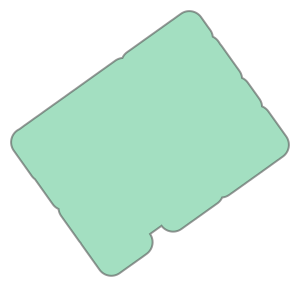

In [56]:
limit = momepy.buffered_limit(df, buffer=20)
limit

In [57]:
tessellation = momepy.Tessellation(df, unique_id='ID', limit=limit)

Inward offset...
Generating input point array...
Generating Voronoi diagram...
Generating GeoDataFrame...
Dissolving Voronoi polygons...


In [58]:
tessellation_gdf = tessellation.tessellation

In [59]:
tessellation_gdf.head()

,ID,geometry
11,11,"POLYGON ((480409.125 4400613.661, 480415.637 4..."
85,85,"POLYGON ((480465.393 4400632.676, 480465.386 4..."
63,63,"POLYGON ((480407.246 4400658.977, 480407.143 4..."
34,34,"POLYGON ((480419.917 4400667.422, 480419.760 4..."
35,35,"POLYGON ((480432.344 4400676.258, 480432.237 4..."


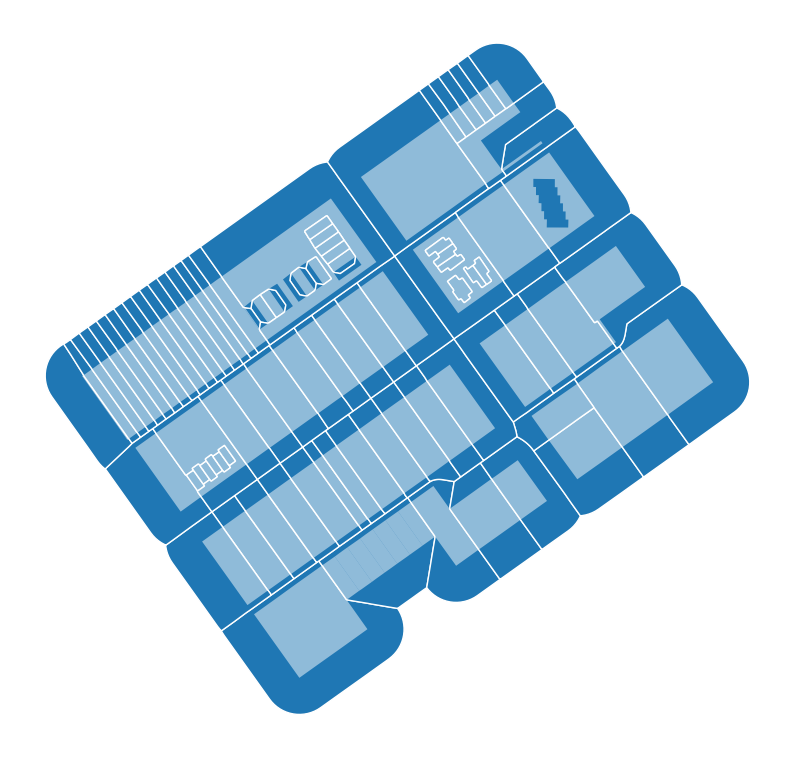

In [22]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation_gdf.plot(ax=ax, edgecolor='white')
df.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()

In [60]:
tessellation_gdf.to_file('tessellation.shp')

In [64]:
tessellation_gdf = tessellation_gdf.reset_index(drop=True)

In [67]:
tessellation_gdf = tessellation_gdf.set_index('ID')


In [77]:
rook = Rook.from_dataframe(tessellation_gdf)

d:\mini-forge\envs\growth_model\Lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


In [78]:
rook.neighbors[41]

[40, 42, 29]

# limit set at 10

In [74]:
limit = momepy.buffered_limit(df, buffer=10)
tessellation = momepy.Tessellation(df, unique_id='ID', limit=limit)
tessellation_gdf = tessellation.tessellation
tessellation_gdf = tessellation_gdf.reset_index(drop=True)
tessellation_gdf.to_file('tessellation_10.shp')

Inward offset...
Generating input point array...
Generating Voronoi diagram...
Generating GeoDataFrame...
Dissolving Voronoi polygons...


C:\Users\abreunig\AppData\Local\Temp\2\ipykernel_6112\3423246744.py:2: UserWarning: Tessellation contains MultiPolygon elements. Initial objects should  be edited. `unique_id` of affected elements: [24, 22].
  tessellation = momepy.Tessellation(df, unique_id='ID', limit=limit)


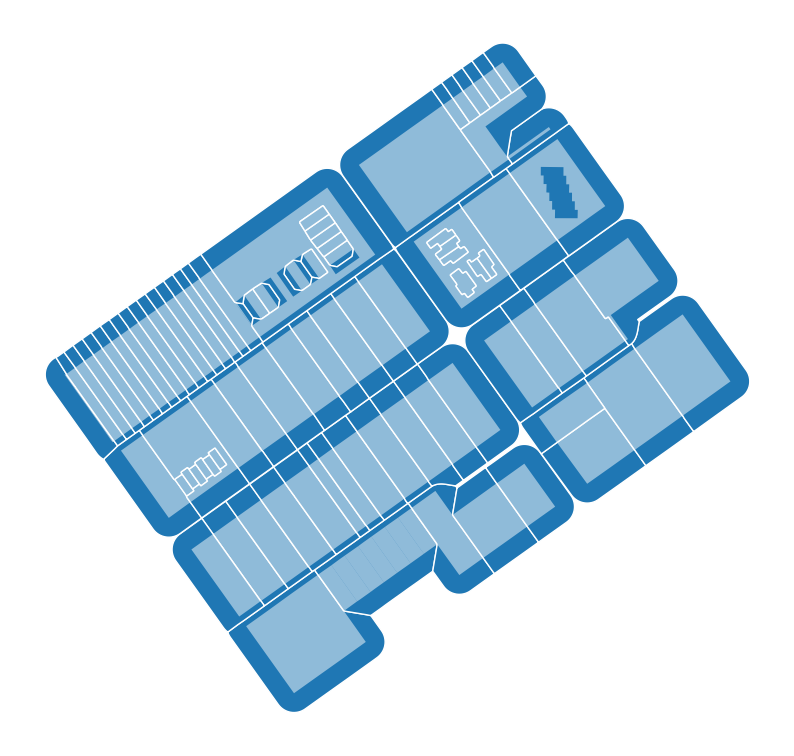

In [75]:
f, ax = plt.subplots(figsize=(10, 10))
tessellation_gdf.plot(ax=ax, edgecolor='white')
df.plot(ax=ax, color='white', alpha=.5)
ax.set_axis_off()
plt.show()